<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Introduction-to-namespaces-and-scopes" data-toc-modified-id="Introduction-to-namespaces-and-scopes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction to namespaces and scopes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Namespaces" data-toc-modified-id="Namespaces-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Namespaces</a></span></li><li><span><a href="#Scope" data-toc-modified-id="Scope-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Scope</a></span></li><li><span><a href="#Tip:" data-toc-modified-id="Tip:-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Tip:</a></span></li><li><span><a href="#Scope-resolution-for-variable-names-via-the-LEGB-rule." data-toc-modified-id="Scope-resolution-for-variable-names-via-the-LEGB-rule.-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Scope resolution for variable names via the LEGB rule.</a></span></li></ul></li></ul></li><li><span><a href="#1.-LG---Local-and-Global-scopes" data-toc-modified-id="1.-LG---Local-and-Global-scopes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1. LG - Local and Global scopes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Here-is-why:" data-toc-modified-id="Here-is-why:-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Here is why:</a></span></li><li><span><a href="#Here-is-why:" data-toc-modified-id="Here-is-why:-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Here is why:</a></span></li></ul></li></ul></li><li><span><a href="#LEG---Local,-Enclosed,-and-Global-scope" data-toc-modified-id="LEG---Local,-Enclosed,-and-Global-scope-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LEG - Local, Enclosed, and Global scope</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Here-is-why:" data-toc-modified-id="Here-is-why:-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Here is why:</a></span></li></ul></li></ul></li><li><span><a href="#LEGB---Local,-Enclosed,-Global,-Built-in" data-toc-modified-id="LEGB---Local,-Enclosed,-Global,-Built-in-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LEGB - Local, Enclosed, Global, Built-in</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Here-is-why:" data-toc-modified-id="Here-is-why:-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Here is why:</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#A-rule-of-thumb" data-toc-modified-id="A-rule-of-thumb-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>A rule of thumb</a></span></li></ul></li></ul></li><li><span><a href="#Warning:-For-loop-variables-&quot;leaking&quot;-into-the-global-namespace" data-toc-modified-id="Warning:-For-loop-variables-&quot;leaking&quot;-into-the-global-namespace-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Warning: For-loop variables "leaking" into the global namespace</a></span></li></ul></li><li><span><a href="#Reusing-global-variable-names-and-UnboundLocalErrors" data-toc-modified-id="Reusing-global-variable-names-and-UnboundLocalErrors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reusing global variable names and <code>UnboundLocalErrors</code></a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Namespaces, scope resolution, and the LEGB rule
    
</font>
</div>

# Introduction to namespaces and scopes
<hr style="border:2px solid black"> </hr>

### Namespaces

Roughly speaking, namespaces are just containers for mapping names to objects. As you might have already heard, everything in Python - literals, lists, dictionaries, functions, classes, etc. - is an object.  
Such a "name-to-object" mapping allows us to access an object by a name that we've assigned to it. E.g., if we make a simple string assignment via `a_string = "Hello string"`, we created a reference to the `"Hello string"` object, and henceforth we can access via its variable name `a_string`.

We can picture a namespace as a Python dictionary structure, where the dictionary keys represent the names and the dictionary values the object itself (and this is also how namespaces are currently implemented in Python), e.g., 

<pre>a_namespace = {'name_a':object_1, 'name_b':object_2, ...}</pre>  




Now, the tricky part is that we have multiple independent namespaces in Python, and names can be reused for different namespaces (only the objects are unique, for example:

<pre>a_namespace = {'name_a':object_1, 'name_b':object_2, ...}
b_namespace = {'name_a':object_3, 'name_b':object_4, ...}</pre>

For example, everytime we call a `for-loop` or define a function, it will create its own namespace. Namespaces also have different levels of hierarchy (the so-called "scope"), which we will discuss in more detail in the next section.

### Scope

In the section above, we have learned that namespaces can exist independently from each other and that they are structured in a certain hierarchy, which brings us to the concept of "scope". The "scope" in Python defines the "hierarchy level" in which we search namespaces for certain "name-to-object" mappings.  
For example, let us consider the following code:

In [1]:
i = 1

def foo():
    i = 5
    print(i, 'in foo()')

print(i, 'global')

foo()

1 global
5 in foo()


Here, we just defined the variable name `i` twice, once on the `foo` function.

- `foo_namespace = {'i':object_3, ...}`  
- `global_namespace = {'i':object_1, 'name_b':object_2, ...}`

So, how does Python know which namespace it has to search if we want to print the value of the variable `i`? This is where Python's LEGB-rule comes into play, which we will discuss in the next section.

### Tip:
If we want to print out the dictionary mapping of the global and local variables, we can use the
the functions `global()` and `local()`

In [11]:
#print(globals()) # prints global namespace
#print(locals()) # prints local namespace

glob = 1

def foo():
    loc = 5
    print('loc in foo():', 'loc' in locals())

foo()
print('loc in global:', 'loc' in globals())    
print('glob in global:', 'foo' in globals())

loc in foo(): True
loc in global: False
glob in global: True


### Scope resolution for variable names via the LEGB rule.

We have seen that multiple namespaces can exist independently from each other and that they can contain the same variable names on different hierachy levels. The "scope" defines on which hierarchy level Python searches for a particular "variable name" for its associated object. Now, the next question is: "In which order does Python search the different levels of namespaces before it finds the name-to-object' mapping?"  
To answer is: It uses the LEGB-rule, which stands for

**Local -> Enclosed -> Global -> Built-in**, 

where the arrows should denote the direction of the namespace-hierarchy search order.  

- *Local* can be inside a function or class method, for example.  
- *Enclosed* can be its `enclosing` function, e.g., if a function is wrapped inside another function.  
- *Global* refers to the uppermost level of the executing script itself, and  
- *Built-in* are special names that Python reserves for itself.  

So, if a particular name:object mapping cannot be found in the local namespaces, the namespaces of the enclosed scope are being searched next. If the search in the enclosed scope is unsuccessful, too, Python moves on to the global namespace, and eventually, it will search the built-in namespace (side note: if a name cannot found in any of the namespaces, a *NameError* will is raised).

**Note**:  
Namespaces can also be further nested, for example if we import modules, or if we are defining new classes. In those cases we have to use prefixes to access those nested namespaces. Let me illustrate this concept in the following code block:

In [8]:
import numpy
import math
import scipy

print(math.pi, 'from the math module')
print(numpy.pi, 'from the numpy package')
print(scipy.pi, 'from the scipy package')

3.141592653589793 from the math module
3.141592653589793 from the numpy package
3.141592653589793 from the scipy package


(This is also why we have to be careful if we import modules via "`from a_module import *`", since it loads the variable names into the global namespace and could potentially overwrite already existing variable names)

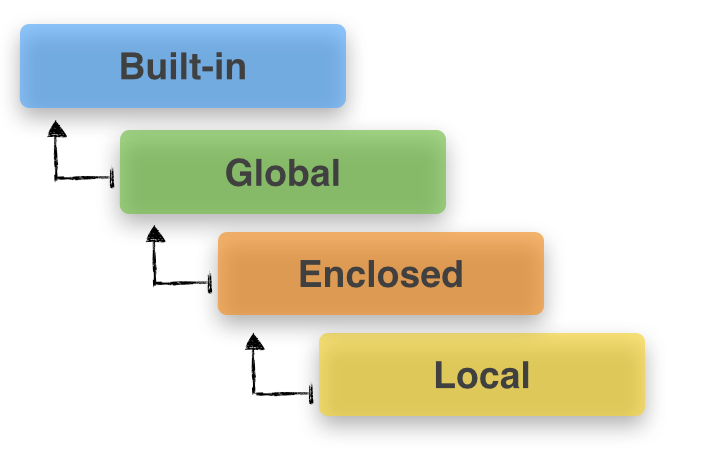

# 1. LG - Local and Global scopes
<hr style="border:2px solid black"> </hr>

**Example 1.1**  
As a warm-up exercise, let us first forget about the enclosed (E) and built-in (B) scopes in the LEGB rule and only take a look at LG - the local and global scopes.  
What does the following code print?

In [1]:
a_var = 'global variable'

def a_func():
    print(a_var, '[ a_var inside a_func() ]')

a_func()
print(a_var, '[ a_var outside a_func() ]')

**a)**
<pre>raises an error</pre>

**b)** 
<pre>
global value [ a_var outside a_func() ]</pre>

**c)** 
<pre>global value [ a_var inside a_func() ]  
global value [ a_var outside a_func() ]</pre>




[[go to solution](#solutions)]

### Here is why:

We call `a_func()` first, which is supposed to print the value of `a_var`. According to the LEGB rule, the function will first look in its own local scope (L) if `a_var` is defined there. Since `a_func()` does not define its own `a_var`, it will look one-level above in the global scope (G) in which `a_var` has been defined previously.
<br>
<br>

**Example 1.2**  
Now, let us define the variable `a_var` in the global and the local scope.  
Can you guess what the following code will produce?

In [2]:
a_var = 'global value'

def a_func():
    a_var = 'local value'
    print(a_var, '[ a_var inside a_func() ]')

a_func()
print(a_var, '[ a_var outside a_func() ]')

**a)**
<pre>raises an error</pre>

**b)** 
<pre>local value [ a_var inside a_func() ]
global value [ a_var outside a_func() ]</pre>

**c)** 
<pre>global value [ a_var inside a_func() ]  
global value [ a_var outside a_func() ]</pre>


[[go to solution](#solutions)]

### Here is why:

When we call `a_func()`, it will first look in its local scope (L) for `a_var`, since `a_var` is defined in the local scope of `a_func`, its assigned value `local variable` is printed. Note that this doesn't affect the global variable, which is in a different scope.

<br>
However, it is also possible to modify the global by, e.g., re-assigning a new value to it if we use the global keyword as the following example will illustrate:

In [3]:
a_var = 'global value'

def a_func():
    global a_var
    a_var = 'local value'
    print(a_var, '[ a_var inside a_func() ]')

print(a_var, '[ a_var outside a_func() ]')
a_func()
print(a_var, '[ a_var outside a_func() ]')

global value [ a_var outside a_func() ]
local value [ a_var inside a_func() ]
local value [ a_var outside a_func() ]


But we have to be careful about the order: it is easy to raise an `UnboundLocalError` if we don't explicitly tell Python that we want to use the global scope and try to modify a variable's value (remember, the right side of an assignment operation is executed first):

In [4]:
a_var = 1

def a_func():
    a_var = a_var + 1
    print(a_var, '[ a_var inside a_func() ]')

print(a_var, '[ a_var outside a_func() ]')
a_func()

UnboundLocalError: local variable 'a_var' referenced before assignment

1 [ a_var outside a_func() ]


# LEG - Local, Enclosed, and Global scope
<hr style="border:2px solid black"> </hr>

Now, let us introduce the concept of the enclosed (E) scope. Following the order "Local -> Enclosed -> Global", can you guess what the following code will print?

**Example 2.1**

In [4]:
a_var = 'global value'

def outer():
    a_var = 'enclosed value'
    
    def inner():
        a_var = 'local value'
        print(a_var)
    
    inner()

outer()

**a)**
<pre>global value</pre>

**b)** 
<pre>enclosed value</pre>

**c)** 
<pre>local value</pre>

[[go to solution](#solutions)]

### Here is why:

Let us quickly recapitulate what we just did: We called `outer()`, which defined the variable `a_var` locally (next to an existing `a_var` in the global scope). Next, the `outer()` function called `inner()`, which in turn defined a variable with of name `a_var` as well. The `print()` function inside `inner()` searched in the local scope first (L->E) before it went up in the scope hierarchy, and therefore it printed the value that was assigned in the local scope.

Similar to the concept of the `global` keyword, which we have seen in the section above, we can use the keyword `nonlocal` inside the inner function to explicitly access a variable from the outer (enclosed) scope in order to modify its value.  
Note that the `nonlocal` keyword was added in Python 3.x and is not implemented in Python 2.x (yet).

In [5]:
a_var = 'global value'

def outer():
       a_var = 'local value'
       print('outer before:', a_var)
       def inner():
           nonlocal a_var
           a_var = 'inner value'
           print('in inner():', a_var)
       inner()
       print("outer after:", a_var)
outer()

outer before: local value
in inner(): inner value
outer after: inner value


#  LEGB - Local, Enclosed, Global, Built-in
<hr style="border:2px solid black"> </hr>

To wrap up the LEGB rule, let us come to the built-in scope. Here, we will define our "own" length-funcion, which happens to bear the same name as the in-built `len()` function. What outcome do you excpect if we'd execute the following code?

**Example 3**

In [6]:
a_var = 'global variable'

def len(in_var):
    print('called my len() function')
    l = 0
    for i in in_var:
        l += 1
    return l

def a_func(in_var):
    len_in_var = len(in_var)
    print('Input variable is of length', len_in_var)

a_func('Hello, World!')

**a)**
<pre>raises an error (conflict with in-built `len()` function)</pre>

**b)** 
<pre>called my len() function
Input variable is of length 13</pre>

**c)** 
<pre>Input variable is of length 13</pre>

[[go to solution](#solutions)]

### Here is why:

Since the exact same names can be used to map names to different objects - as long as the names are in different name spaces - there is no problem of reusing the name `len` to define our own length function (this is just for demonstration pruposes, it is NOT recommended). As we go up in Python's L -> E -> G -> B hierarchy, the function `a_func()` finds `len()` already in the global scope (G) first before it attempts to search the built-in (B) namespace.

<a name ="assessment"></a>
<br>
<br>

# Conclusion

I hope this short tutorial was helpful to understand the basic concept of Python's scope resolution order using the LEGB rule. I want to encourage you (as a little self-assessment exercise) to look at the code snippets again tomorrow and check if you can correctly predict all their outcomes.

#### A rule of thumb

In practice, **it is usually a bad idea to modify global variables inside the function scope**, since it often be the cause of confusion and weird errors that are hard to debug.  
If you want to modify a global variable via a function, it is recommended to pass it as an argument and reassign the return-value.  
For example:

In [42]:
a_var = 2

def a_func(some_var):
    return 2**3

a_var = a_func(a_var)
print(a_var)

8


## Warning: For-loop variables "leaking" into the global namespace

In contrast to some other programming languages, `for-loops` will use the scope they exist in and leave their defined loop-variable behind.


In [5]:
for a in range(5):
    if a == 4:
        print(a, '-> a in for-loop')
print(a, '-> a in global')

4 -> a in for-loop
4 -> a in global


**This also applies if we explicitly defined the `for-loop` variable in the global namespace before!** In this case it will rebind the existing variable:

In [9]:
b = 1
for b in range(5):
    if b == 4:
        print(b, '-> b in for-loop')
print(b, '-> b in global')

4 -> b in for-loop
4 -> b in global


However, in **Python 3.x**, we can use closures to prevent the for-loop variable to cut into the global namespace. Here is an example (exectuted in Python 3.4):

In [1]:
i = 1
print([i for i in range(5)])
print(i, '-> i in global')

[0, 1, 2, 3, 4]
1 -> i in global


Why did I mention "Python 3.x"? Well, as it happens, the same code executed in Python 2.x would print:

<pre>
4 -> i in global
<pre>

This goes back to a change that was made in Python 3.x and is described in [What’s New In Python 3.0](https://docs.python.org/3/whatsnew/3.0.html) as follows:

"List comprehensions no longer support the syntactic form `[... for var in item1, item2, ...]`. Use `[... for var in (item1, item2, ...)]` instead. Also note that list comprehensions have different semantics: they are closer to syntactic sugar for a generator expression inside a `list()` constructor, and in particular the loop control variables are no longer leaked into the surrounding scope."

# Reusing global variable names and `UnboundLocalErrors`
<hr style="border:2px solid black"> </hr>

In [1]:
def my_func():
    print(var)  # want to access global variable
    var = 'locally changed'  # but Python thinks we forgot to define the local variable!


var = 'global'
my_func()

UnboundLocalError: local variable 'var' referenced before assignment

In [2]:
def my_func():
    # We need this line to fix the error above
    global var
    print(var)  # want to access global variable
    var = 'locally changed'  # changes the gobal variable


var = 'global'

my_func()
print(var)

global
locally changed


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://nbviewer.org/github/rasbt/python_reference/blob/master/tutorials/not_so_obvious_python_stuff.ipynb?create=1
- https://nbviewer.org/github/rasbt/python_reference/blob/master/tutorials/scope_resolution_legb_rule.ipynb?create=1

    
</font>
</div>